In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')
from scipy.stats import norm

In [2]:
df = pd.read_csv(r"cleaned.csv")
df

,Unnamed: 0,Salary,Designation,JobCity,Gender,10percentage,10board,12graduation,12percentage,12board,...,English,Logical,Quant,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,EXPERIENCE,AGE
0,0,420000,senior quality engineer,BANGALORE,f,84.30,"board ofsecondary education,ap",2007,95.80,"board of intermediate education,ap",...,515,585,525,0.9737,0.8128,0.5269,1.35490,-0.4455,3,25
1,1,500000,assistant manager,INDORE,m,85.40,cbse,2007,85.00,cbse,...,695,610,780,-0.7335,0.3789,1.2396,-0.10760,0.8637,2,26
2,2,325000,system engineer,CHENNAI,f,85.00,cbse,2010,68.20,cbse,...,615,545,370,0.2718,1.7109,0.1637,-0.86820,0.6721,1,23
3,3,1100000,senior software engineer,GURGAON,m,85.60,cbse,2007,83.60,cbse,...,635,585,625,0.0464,0.3448,-0.3440,-0.40780,-0.9194,4,26
4,5,300000,system engineer,HYDERABAD,m,89.92,state board,2010,87.00,state board,...,560,555,620,-0.3027,-0.6201,-2.2954,-0.74150,-0.8608,1,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3976,3993,280000,software engineer,DELHI,m,52.09,cbse,2006,55.50,cbse,...,365,334,475,-0.1082,0.3448,0.2366,0.64980,-0.9194,1,28
3977,3994,100000,technical writer,HYDERABAD,f,90.00,state board,2009,93.00,state board,...,415,410,535,-0.3027,0.8784,0.9322,0.77980,-0.0943,0,23
3978,3995,320000,associate software engineer,BANGALORE,m,81.86,"bse,odisha",2008,65.50,"chse,odisha",...,475,475,465,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615,2,24
3979,3996,200000,software developer,BANGALORE,f,78.72,state board,2010,69.88,state board,...,450,410,320,-0.1590,0.0459,-0.4511,-0.36120,-0.0943,1,23


In [3]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df

,Salary,Designation,JobCity,Gender,10percentage,10board,12graduation,12percentage,12board,CollegeID,...,English,Logical,Quant,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,EXPERIENCE,AGE
0,420000,senior quality engineer,BANGALORE,f,84.30,"board ofsecondary education,ap",2007,95.80,"board of intermediate education,ap",1141,...,515,585,525,0.9737,0.8128,0.5269,1.35490,-0.4455,3,25
1,500000,assistant manager,INDORE,m,85.40,cbse,2007,85.00,cbse,5807,...,695,610,780,-0.7335,0.3789,1.2396,-0.10760,0.8637,2,26
2,325000,system engineer,CHENNAI,f,85.00,cbse,2010,68.20,cbse,64,...,615,545,370,0.2718,1.7109,0.1637,-0.86820,0.6721,1,23
3,1100000,senior software engineer,GURGAON,m,85.60,cbse,2007,83.60,cbse,6920,...,635,585,625,0.0464,0.3448,-0.3440,-0.40780,-0.9194,4,26
4,300000,system engineer,HYDERABAD,m,89.92,state board,2010,87.00,state board,5086,...,560,555,620,-0.3027,-0.6201,-2.2954,-0.74150,-0.8608,1,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3976,280000,software engineer,DELHI,m,52.09,cbse,2006,55.50,cbse,6268,...,365,334,475,-0.1082,0.3448,0.2366,0.64980,-0.9194,1,28
3977,100000,technical writer,HYDERABAD,f,90.00,state board,2009,93.00,state board,4883,...,415,410,535,-0.3027,0.8784,0.9322,0.77980,-0.0943,0,23
3978,320000,associate software engineer,BANGALORE,m,81.86,"bse,odisha",2008,65.50,"chse,odisha",9786,...,475,475,465,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615,2,24
3979,200000,software developer,BANGALORE,f,78.72,state board,2010,69.88,state board,979,...,450,410,320,-0.1590,0.0459,-0.4511,-0.36120,-0.0943,1,23


# EDA

In [5]:
df.columns

Index(['Salary', 'Designation', 'JobCity', 'Gender', '10percentage', '10board',
       '12graduation', '12percentage', '12board', 'CollegeID', 'CollegeTier',
       'Degree', 'Specialization', 'collegeGPA', 'CollegeState',
       'GraduationYear', 'English', 'Logical', 'Quant', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience',
       'EXPERIENCE', 'AGE'],
      dtype='object')

<AxesSubplot:xlabel='CollegeID', ylabel='Salary'>

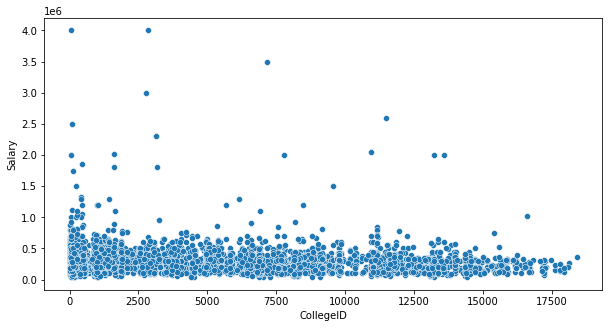

In [13]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x='CollegeID', y='Salary')

Wall time: 1.05 s


Text(0.5, 1.0, 'Age VS Count')

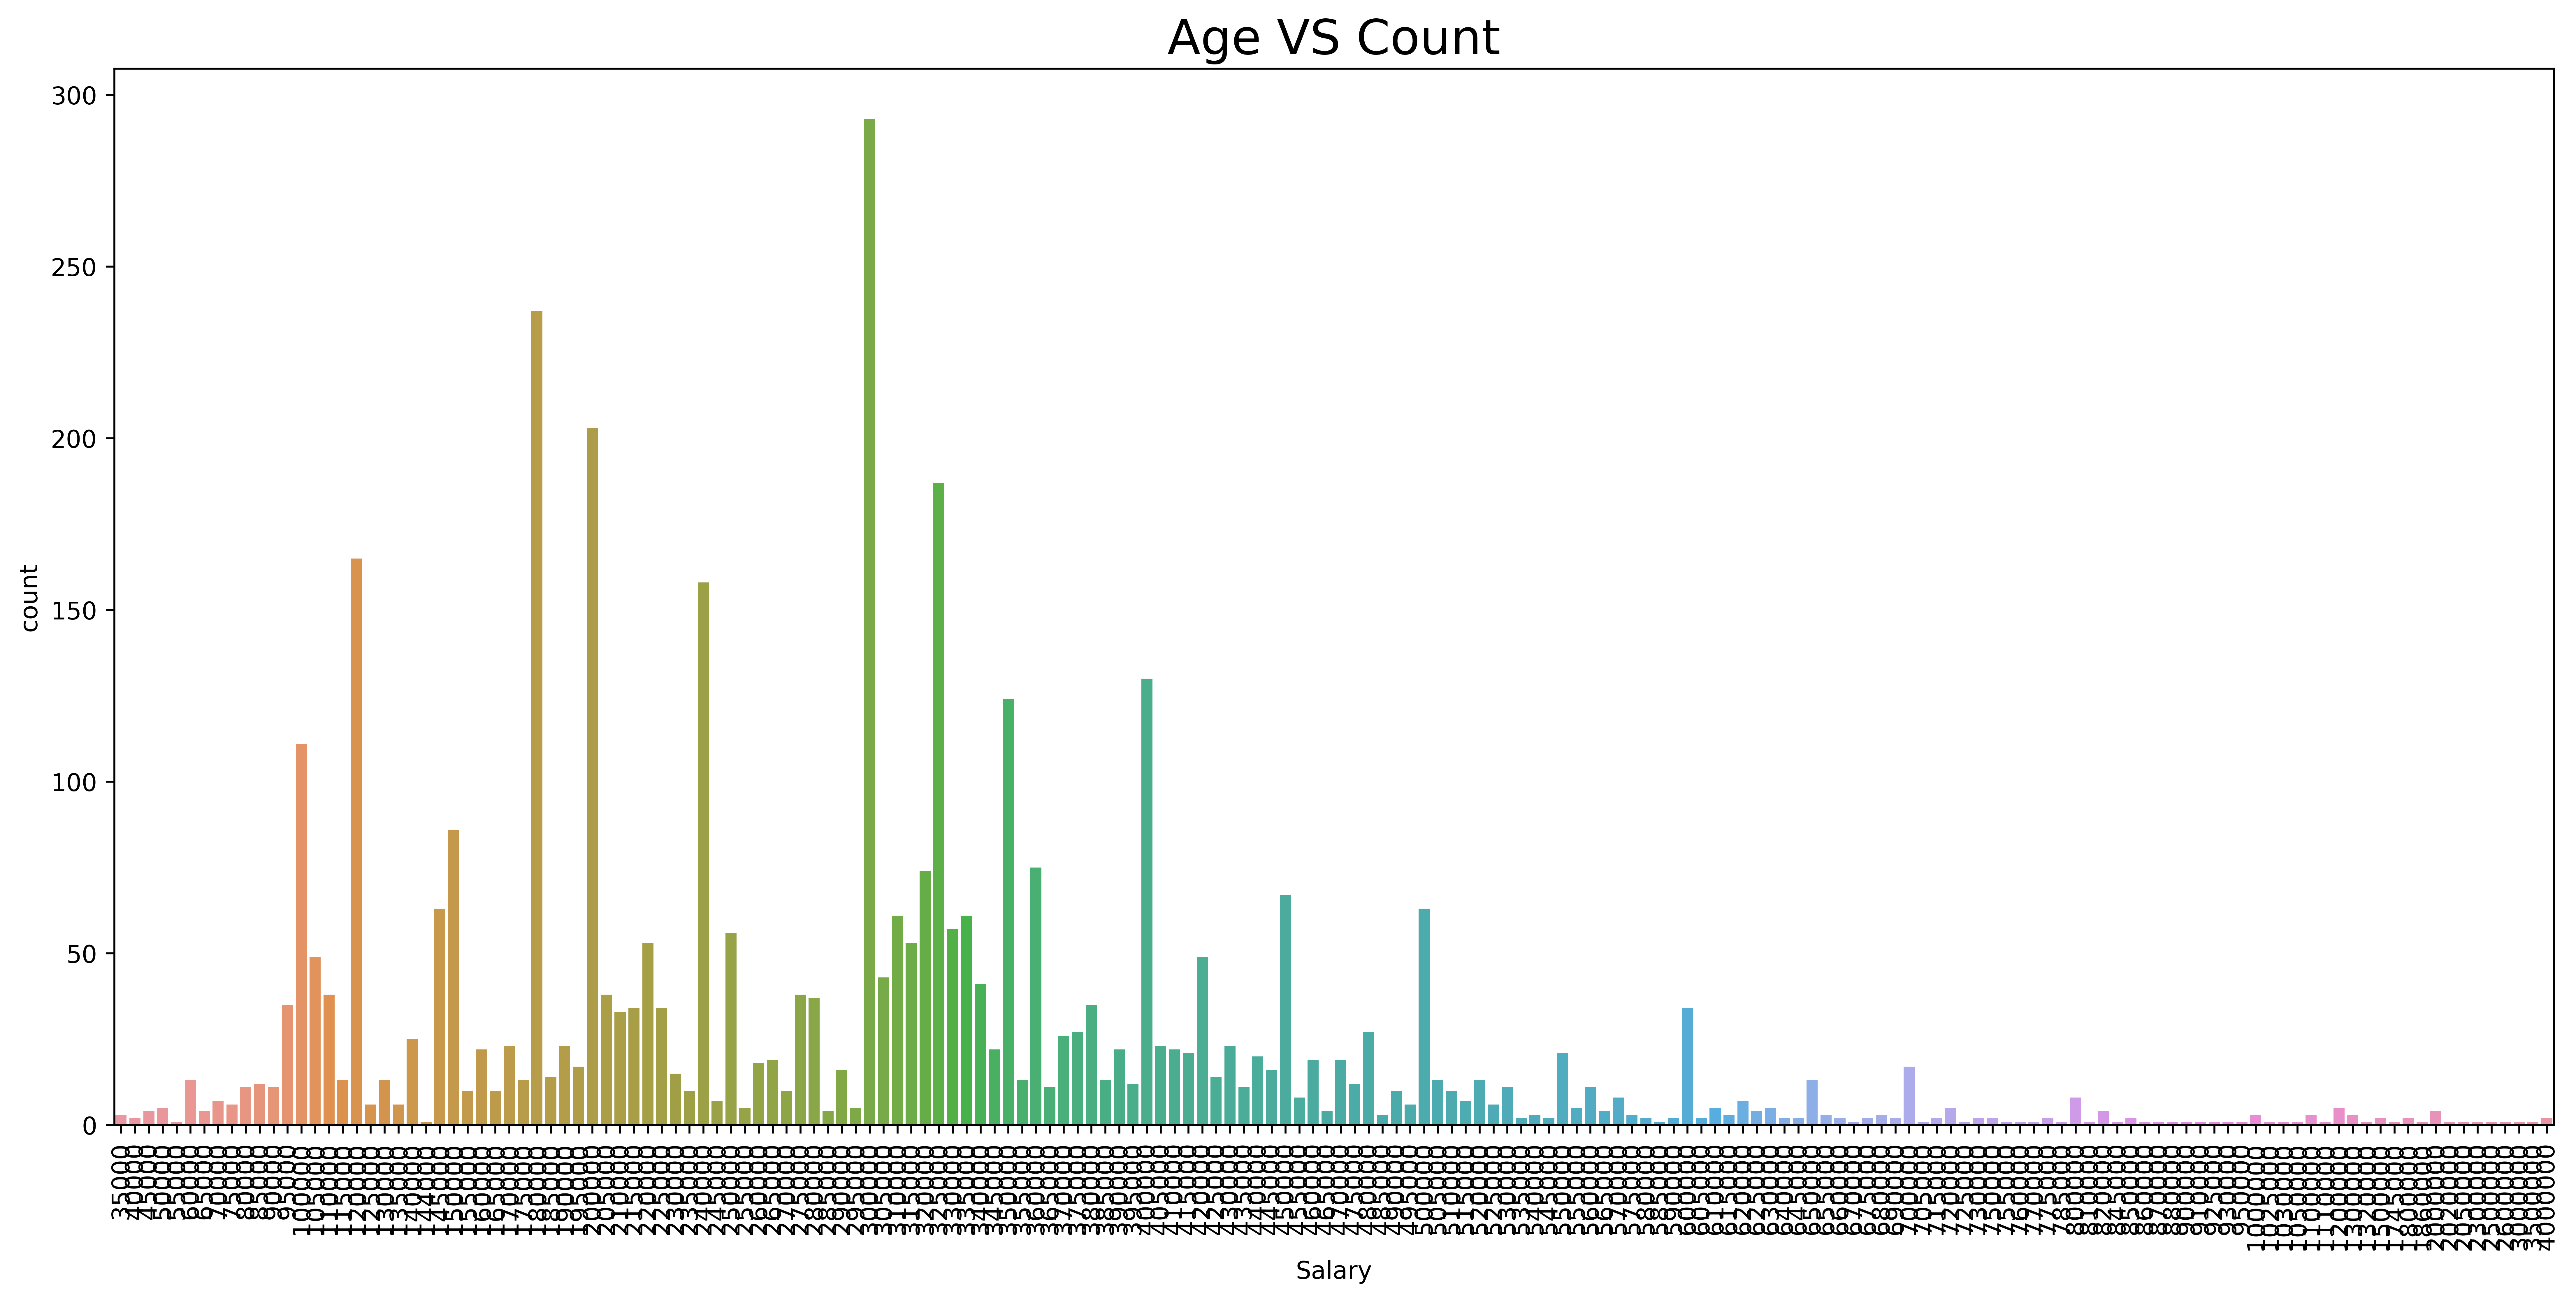

In [21]:
%%time
plt.figure(figsize=(18,8),dpi=600)
sns.countplot(data = df,x = 'Salary')
plt.xticks(rotation = 90)
plt.title('Age VS Count',fontsize=20);